In [3]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Flatten,Activation
from keras.optimizers import SGD

Using TensorFlow backend.


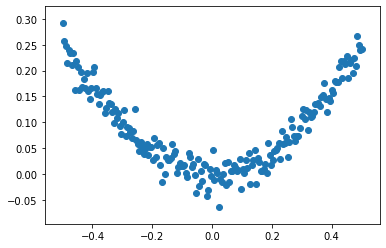

In [4]:
#使用numpy生成200个随机点
x_data = np.linspace(-0.5,0.5,200) #此范围内均匀的生成200个点
noise = np.random.normal(0,0.02,x_data.shape)
y_data = np.square(x_data) + noise #square:开平方

#显示随机点
plt.scatter(x_data,y_data)
plt.show()

In [5]:
#用曲线来拟合此分布   用多个神经元可拟合复杂的
#1-10-1
model = Sequential()
model.add(Dense(10,input_dim=1))  #Activation有两种添加方法
model.add(Activation('tanh'))
model.add(Dense(1)) #input_dim可不用写，前面有，默认为10
model.add(Activation('tanh'))

#自定义优化算法
sgd = SGD(lr = 0.3)
#增大学习率是为了学习的更快些
model.compile(loss = 'mse',optimizer =sgd)

cost: 0.00631616
cost: 0.0035249793
cost: 0.0015969896
cost: 0.000821698
cost: 0.00046033264
cost: 0.00038663408
cost: 0.00037608258
w: [[ 0.1322091   0.1529139  -1.1527817  -0.35970187  0.18078491  0.19332547
  -0.2992846   1.2786024  -1.2724181   0.18623833]] b: [-0.35417348  0.11480114  0.47069314  0.14561398 -0.04984102  0.00600198
  0.13189791  0.43648615  0.54965866  0.02733486]


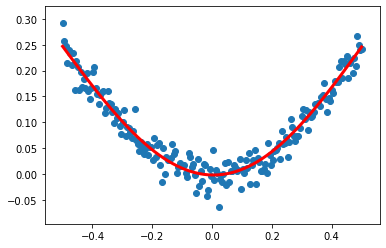

In [7]:
for step in range(3001):
    cost = model.train_on_batch(x_data,y_data)
    if step%500 == 0:
        print('cost:',cost)
        
w,b = model.layers[0].get_weights()
print('w:',w,'b:',b)

y_pred = model.predict(x_data)

plt.scatter(x_data,y_data)
plt.plot(x_data,y_pred,'r-',lw=3)
plt.show()